In [2]:
import pandas as pd
import numpy as numpy
import scipy.spatial.distance as scp_dst
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.colors as clrs
import matplotlib.pyplot as plt
import json
from pprint import pprint
from pandas.io.json import json_normalize

with open('aminer_papers_0_s3.json') as data_file:    
    data0 = json.load(data_file)

# with open('aminer_papers_1_s3.json') as data_file:    
#     data1 = json.load(data_file)
    
# with open('aminer_papers_2_s3.json') as data_file:    
#     data2 = json.load(data_file)

# with open('aminer_papers_3_s3.json') as data_file:    
#     data3 = json.load(data_file)




    
# data
# f = open('test.json','r')
# data = f.read()
# data


# json_normalize(data)
# df['authors']
# df

In [3]:
# TODO: Merge dataframes
df0 = pd.DataFrame.from_dict(json_normalize(data0), orient='columns')
df0.head(10)

# Get CS keywords

df0_new = df0.dropna(subset=['keywords']) #262153
df0_new.head(20)


,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
2,The method to making technology roadmap is int...,"[{'name': 'MO Chou'}, {'name': 'CHEN Jiqing'},...",NaN,53e99784b7602d9701f3e132,NaN,NaN,19,"[science and technology production, technology...",zh,NaN,95,90,NaN,NaN,Practice Research on Technology Roadmap for El...,NaN,Science and Technology Management Research,NaN,2013
3,Drought is the first place in all the natural ...,"[{'name': 'Peijuan Wang'}, {'name': 'Jiahua Zh...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011
4,Determination of total sugar can serve to moni...,"[{'name': 'LI Li-li', 'org': 'Yantai Institute...",NaN,53e99784b7602d9701f3e135,NaN,NaN,07,"[metabolites, Jerusalem artichoke, total sugar...",zh,1,93+97,90,NaN,NaN,The effect of metabolites on the determination...,NaN,Food Science and Technology,NaN,2012
7,This paper discussed the planning and design m...,"[{'name': 'LIU Yu-qiong', 'org': 'School of Re...",NaN,53e99784b7602d9701f3e139,NaN,NaN,28,"[Planning and design method, Mountainous regio...",zh,1,364,362,NaN,NaN,Planning and Design Method of Land Consolidati...,NaN,Journal of Anhui Agricultural Sciences,NaN,2012
8,Rough set is a mathematical tool to deal with ...,NaN,NaN,53e99784b7602d9701f3e13a,NaN,NaN,11,"[Data Mining, Rough Set, Algorithm, Rules Extr...",zh,3,106,104,NaN,NaN,A Data Mining Based on Rough Set Theory,NaN,Software Guide,NaN,2012
12,Tumor necrosis factor-alpha (TNF-α) is a multi...,"[{'name': 'Pelin Arda-Pirincci', 'org': 'Depar...",10.1007/s11010-010-0678-0,53e99784b7602d9701f3e13e,NaN,1573-4919,1-2,[glucagon-like peptide-2 � tnf-a/actinomycin d...,en,NaN,27,13,NaN,"[53e99b4ab7602d97023ea8fd, 53e997f8b7602d9701f...",The role of glucagon-like peptide-2 on apoptos...,"[http://dx.doi.org/10.1007/s11010-010-0678-0, ...",Molecular and cellular biochemistry,350,2011
14,The carbon fiber used PAN as precursor is wide...,"[{'name': 'JIN Li-guo', 'org': 'China Syntheti...",NaN,53e99784b7602d9701f3e140,NaN,NaN,10,"[production technology, carbon fiber, present ...",zh,18,10+22,5,NaN,NaN,Present Situation of China Carbon Fiber Indust...,NaN,Synthetic Fiber in China,NaN,2009
15,NaN,"[{'name': 'Carmen Sandoval C'}, {'name': 'Alic...",10.4067/S0716-10182008000600009,53e99784b7602d9701f3e141,NaN,NaN,6,"[severity of illness index, retrospective stud...",en,NaN,NaN,NaN,NaN,"[53e9b458b7602d9703f55c97, 53e9bc79b7602d97048...",Síndrome de Ramsay-Himt en Pediatría: Reporte ...,[http://dx.doi.org/10.4067/S0716-1018200800060...,Revista Chilena De Infectologia,25,2008
16,Using a cryogenic scanned probe microscope (SP...,"[{'name': 'M.A. Eriksson', 'org': 'Division of...",10.1006/spmi.1996.0100,53e99784b7602d9701f3e142,NaN,Superlattices and Microstructures,4,"[scanning probe microscope, two dimensional el...",en,18,440,435,NaN,NaN,Effect of a charged scanned probe microscope t...,[http://dx.doi.org/10.1006/spmi.1996.0100],Superlattices and Microstructures,20,1996
23,This paper presents an embedded controller of ...,NaN,NaN,53e99784b7602d9701f3e150,NaN,NaN,02,"[communication protocol, FT245BM chip, embedde...",zh,1,45,43,NaN,NaN,The application of an embedded controller to a...,NaN,Industrial Instrumentation & Automation,NaN,2005


In [4]:
from collections import defaultdict

df0_new.shape

keyword_count = defaultdict(dict)
for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in keyword_count):
            keyword_count[low_case_keyword] = keyword_count[low_case_keyword] + 1
        else:
            keyword_count[low_case_keyword] = 0
        break;
    
    

In [5]:
# keyword_count

keyword_count_sorted = sorted(keyword_count.items(), key=lambda x: x[1], reverse=True)
keyword_count_sorted
#     print (keyword)
#     print (count)
#     break
    

[('bioinformatics', 5038),
 ('biomedical research', 4859),
 ('nature', 3647),
 ('british', 1240),
 ('genetics', 709),
 ('indexation', 372),
 ('first page', 344),
 ('spectrum', 319),
 ('higher education', 314),
 ('enzyme', 275),
 ('diagnosis', 272),
 ('kinetics', 263),
 ('iron', 247),
 ('satisfiability', 242),
 ('oscillations', 240),
 ('diabetes mellitus', 229),
 ('application', 226),
 ('humanidades', 214),
 ('high energy physics', 208),
 ('null', 203),
 ('cutaneous biology', 202),
 ('public health', 194),
 ('global warming', 194),
 ('human factors', 193),
 ('risk factors', 185),
 ('thermodynamics', 185),
 ('pediatric', 181),
 ('ergonomics', 180),
 ('injury prevention', 178),
 ('nursing', 178),
 ('magnetic field', 177),
 ('copper', 177),
 ('quantum mechanics', 176),
 ('american college of gastroenterology', 176),
 ('cross section', 175),
 ('occupational safety', 174),
 ('breast cancer', 173),
 ('text mining', 166),
 ('health care', 166),
 ('digital library', 165),
 ('biomedical and beha

In [7]:
cs_keywords = ['internet','text mining','data mining', 'polymorphism','mathematical model','information','information technology', 'data', 'algorithms', 'training', 
              'model','data collection','analysis','neural network','data analysis','computer science', 'information retrieval', 'information system', 'classification','pattern recognition'
               'signal processing','software engineering','social network','software system','image processing','data processing',
              'computer simulation','statistical analysis','image', 'video', 'machine', 'learning', 'computer', 'optimization', 'artificial', 'intelligence', 'complexity']
cs_papers = []

for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers.append(row[4])
            break;
            
# cs_papers.get(0) #10617

In [ ]:
df0_new.dtypes

In [8]:
# Create CS data-frame
import math
import types

cs_papers_and_ref_papers = defaultdict(dict)

for row in df0_new.itertuples(): 
    current_keywords = row[8]
    for keyword in current_keywords:
        low_case_keyword = keyword.lower()
        if(low_case_keyword in cs_keywords):
            cs_papers_and_ref_papers[row[4]] = True
            references = row[14]
            if(type(references) is list):   
                for ref in references:
                    cs_papers_and_ref_papers[ref] = True
            break;

cs_dataframe = pd.DataFrame.from_items([(name, pd.Series(data=None, dtype=series.dtype)) for name, series in df0_new.iteritems()])
cs_dataframe

for row in df0_new.itertuples():
    paper_id = row[4]
    if(paper_id in cs_papers_and_ref_papers):
        cs_dataframe.loc[len(cs_dataframe)] = df0_new.loc[row[0]]
        
cs_dataframe.shape

(12101, 19)

In [23]:
# Create map of paper_id vs number

cs_papers_number_map = {}

index = 0
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    cs_papers_number_map[current_paper_id] = index
    index = index + 1
    
cs_papers_number_map    

{'53e997aeb7602d9701f8aede': 748,
 '53e997f1b7602d9701ff153b': 5198,
 '53e997d1b7602d9701fc3075': 2028,
 '53e9981db7602d9702037c4d': 9625,
 '53e997c2b7602d9701fb11be': 1305,
 '53e997d1b7602d9701fc90e1': 2476,
 '53e997e3b7602d9701fda2b6': 3804,
 '53e997e3b7602d9701fda1ab': 3801,
 '53e997cbb7602d9701fbd764': 1504,
 '53e9979fb7602d9701f6fbf7': 321,
 '53e997b5b7602d9701f9865f': 913,
 '53e997c2b7602d9701faf27c': 1263,
 '53e9980eb7602d9702026c46': 8571,
 '53e997f1b7602d9701fedf6e': 4944,
 '53e997ddb7602d9701fd3224': 3218,
 '53e9980eb7602d9702021cde': 8289,
 '53e997f8b7602d9701ffd575': 5970,
 '53e997fcb7602d9702008e14': 6680,
 '53e99833b7602d97020582a7': 11727,
 '53e997f1b7602d9701ff21df': 5231,
 '53e997fcb7602d9702004b38': 6456,
 '53e997d6b7602d9701fc95a7': 2496,
 '53e997c6b7602d9701fb5f02': 1375,
 '53e99822b7602d9702043d93': 10550,
 '53e997f1b7602d9701ff2b4f': 5272,
 '53e997cbb7602d9701fbb0f0': 1444,
 '53e997b2b7602d9701f91212': 818,
 '53e99822b7602d9702042283': 10410,
 '53e997d1b7602d9701f

In [10]:
# Create citations graph - adjacency matrix
from collections import defaultdict

# safety checks - 
cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph = defaultdict(dict)
citation_graph_adj_list = []

for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            citation_graph[ref][current_paper_id] = 1

citation_graph    

# df_new = df_new[numpy.isfinite(df_new['references'])]
# df_new
# df[np.isfinite(df['EPS'])]

defaultdict(dict,
            {'53e9be65b7602d9704b2762b': {'53e997bab7602d9701fa1ec4': 1},
             '53e99833b7602d97020582a7': {'53e99833b7602d9702058905': 1},
             '53e9adaab7602d97037a908f': {'53e997ecb7602d9701fea526': 1},
             '53e99f2eb7602d97027fb577': {'53e997bab7602d9701fa1ec4': 1},
             '53e9a8dcb7602d970322e288': {'53e9982cb7602d970205017a': 1},
             '53e9b3dbb7602d9703ecc6f2': {'53e997a2b7602d9701f73289': 1},
             '53e9b070b7602d9703ad8ee3': {'53e99813b7602d970202ab3b': 1},
             '53e9aef7b7602d9703927ebf': {'53e99821b7602d970203eca0': 1,
              '53e99833b7602d970205aeb4': 1,
              '53e99833b7602d970205b4dc': 1},
             '53e9ab1ab7602d970349ecc4': {'53e9979bb7602d9701f6548b': 1,
              '53e997fcb7602d970200a889': 1},
             '53e9b55db7602d9704094ea9': {'53e9981db7602d970203dd50': 1},
             '53e9bce0b7602d97049632cb': {'53e997bab7602d9701fa1ec4': 1},
             '53e99833b7602d97020

In [16]:
# Create citations graph - adjacency list

from collections import defaultdict

# safety checks - 
cs_dataframe = cs_dataframe.dropna(subset=['id'])
 
citation_graph_adj_list = {}

# cnt = 0
for row in cs_dataframe.itertuples(): 
    current_paper_id = row[4]
    references = row[14]
    if(type(references) is list): 
        for ref in references:
            # Ignore the paper for which we don't have entry in cs_paper -- not a "cs_paper"
            if (ref in cs_papers_number_map): 
                ref_number = cs_papers_number_map[ref]
#                 print (ref_number)
#     cnt = cnt + 1            
#     if( cnt > 500):
#         break 
                # Putting an edge in the graph (adj_list)
                if (ref_number in citation_graph_adj_list):
                    elements = citation_graph_adj_list[ref_number]
                    elements.add(cs_papers_number_map[current_paper_id])
                    citation_graph_adj_list[ref_number] = elements
                else:    
                    first_element = set([cs_papers_number_map[current_paper_id]])
                    citation_graph_adj_list[ref_number] = first_element
    else:
        
citation_graph_adj_list    

# df_new = df_ne

{4100: {4449},
 4103: {187, 6802, 6916, 11398},
 8200: {8199},
 4105: {4105},
 4107: {7956},
 4109: {4886},
 8209: {8902, 9027},
 8210: {3310},
 10926: {5200},
 8214: {4972},
 8215: {7170},
 8216: {8217},
 8217: {8217},
 8218: {8299},
 4125: {6151},
 1371: {1207},
 4310: {4389},
 8230: {8223},
 4135: {6471},
 4137: {242},
 1364: {4953},
 4141: {1350, 5300},
 4145: {4087, 11676},
 8243: {8082},
 4150: {1272, 1403, 2953, 9960},
 8251: {6039, 6047},
 4157: {1067},
 8254: {10754},
 8885: {9183},
 4165: {824},
 8262: {7437},
 8263: {8854},
 8264: {3984, 6699},
 8265: {8265, 11059},
 8887: {906},
 164: {10412},
 8273: {664},
 8274: {314},
 4179: {1067},
 8276: {5963},
 4181: {6497},
 8280: {942},
 89: {10015},
 10255: {10544},
 8284: {5052, 6231},
 8890: {9262},
 4192: {3452},
 8290: {493},
 4196: {4040},
 4204: {4205},
 6203: {9572},
 4207: {4207, 10525},
 8304: {313},
 8305: {5577},
 8306: {6761},
 8308: {5934},
 8309: {7349, 8322},
 119: {1540},
 4216: {4202},
 121: {745, 3319, 10142},
 1

In [22]:
# Dumping adj_list to text file 

f = open('citation_graph.adjlist','w')

for key, value in citation_graph_adj_list.items():
    line = str(key)
    for x in value:
        line = line + ' ' + str(x)
    f.write(line + '\n')    
    
f.close()

In [17]:
# file-append.py
f = open('helloworld.txt','w')
f.write('hello world')
f.write('\n' + 'hello world2')
f.write('\n' + 'hello world3')
f.close()

In [5]:
from collections import defaultdict

df_new = df.dropna(subset=['id'])
df_new = df_new.dropna(subset=['references'])


df_new.iloc[0].references[0]
 
graph = defaultdict(dict)
df_new

# for row in df_new.itertuples(): 
#     current_paper = row.id
#     if(current_paper == '53e9b54fb7602d9704085d67'):
#         print (row)
#     references = row.references
#     for ref in references:
#         graph[ref][current_paper] = 1
# graph    

# df_new = df_new[numpy.isfinite(df_new['references'])]
# df_new
# df[np.isfinite(df['EPS'])]

,abstract,authors,doi,id,isbn,issn,issue,keywords,lang,n_citation,page_end,page_start,pdf,references,title,url,venue,volume,year
0,NaN,"[{'name': 'G. Adam'}, {'name': 'K. Schreiber'}]",10.1002/ange.19650770204,53e99784b7602d9701f3e130,NaN,NaN,2,NaN,en,NaN,95,94,NaN,"[53e9a6e6b7602d970301a47d, 53e9b4dfb7602d97040...",1.4-N→N′-Acylwanderung bei einem Diaminosteroid,[http://dx.doi.org/10.1002/ange.19650770204],Angewandte Chemie,77,1965
1,NaN,"[{'name': 'R. Farahbod'}, {'name': 'V. Gervasi...",NaN,53e99784b7602d9701f3e131,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,"[53e9a1d0b7602d9702ac8f1b, 53e9ad1fb7602d97036...",Design and Specification of the CoreASM Execut...,NaN,NaN,NaN,NaN
3,Drought is the first place in all the natural ...,"[{'name': 'Peijuan Wang'}, {'name': 'Jiahua Zh...",10.1109/IGARSS.2011.6049503,53e99784b7602d9701f3e133,NaN,NaN,null,"[canopy parameters, canopy spectrum, different...",en,NaN,1933,1930,NaN,"[53e999c3b7602d970220b9b7, 53e9b1d6b7602d9703c...",The relationship between canopy parameters and...,[http://dx.doi.org/10.1109/IGARSS.2011.6049503],IGARSS,null,2011
6,NaN,"[{'name': 'D J Lum'}, {'name': 'V Upadhyay'}, ...",10.1111/j.1365-2559.2007.02817.x,53e99784b7602d9701f3e137,NaN,NaN,5,NaN,en,NaN,707,704,NaN,"[53e9b395b7602d9703e78794, 55a39b63c91b587b095...",Botryoid fibroepithelial polyp of the urinary ...,[http://dx.doi.org/10.1111/j.1365-2559.2007.02...,Histopathology,51,2007
10,NaN,"[{'name': 'Asami Nakai'}, {'name': 'Akio Ohtan...",10.1163/156855400750262905,53e99784b7602d9701f3e13c,NaN,NaN,5,NaN,en,NaN,410,399,NaN,[56d8f50edabfae2eee8dcb66],Mechanical properties of flat braided composit...,[http://dx.doi.org/10.1163/156855400750262905],Composite Interfaces,7,2000
11,"We consider the problem of determining it(Qd),...",[{'name': 'David Galvin'}],NaN,53e99784b7602d9701f3e13d,NaN,NaN,NaN,NaN,en,1,NaN,NaN,NaN,"[53e9aa61b7602d97033d1644, 53e9adb1b7602d97037...",Independent sets of a xed size in the discrete...,NaN,NaN,NaN,NaN
12,Tumor necrosis factor-alpha (TNF-α) is a multi...,"[{'name': 'Pelin Arda-Pirincci', 'org': 'Depar...",10.1007/s11010-010-0678-0,53e99784b7602d9701f3e13e,NaN,1573-4919,1-2,[glucagon-like peptide-2 � tnf-a/actinomycin d...,en,NaN,27,13,NaN,"[53e99b4ab7602d97023ea8fd, 53e997f8b7602d9701f...",The role of glucagon-like peptide-2 on apoptos...,"[http://dx.doi.org/10.1007/s11010-010-0678-0, ...",Molecular and cellular biochemistry,350,2011
13,NaN,"[{'name': 'Tatsuo Kanda'}, {'name': 'Osamu Yok...",10.1111/j.1440-1746.2004.03399.x,53e99784b7602d9701f3e13f,NaN,0815-9319,6,NaN,en,NaN,719,717,NaN,"[53e9b221b7602d9703cb8663, 53e9b2dbb7602d9703d...",Hepatitis C infection with history of tubercul...,[http://dx.doi.org/10.1111/j.1440-1746.2004.03...,Journal of gastroenterology and hepatology,19,2004
15,NaN,"[{'name': 'Carmen Sandoval C'}, {'name': 'Alic...",10.4067/S0716-10182008000600009,53e99784b7602d9701f3e141,NaN,NaN,6,"[severity of illness index, retrospective stud...",en,NaN,NaN,NaN,NaN,"[53e9b458b7602d9703f55c97, 53e9bc79b7602d97048...",Síndrome de Ramsay-Himt en Pediatría: Reporte ...,[http://dx.doi.org/10.4067/S0716-1018200800060...,Revista Chilena De Infectologia,25,2008
18,NaN,[{'name': 'Christine Trampusch'}],NaN,53e99784b7602d9701f3e144,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,[53e9a952b7602d97032a7c17],"!!"" #$%&!",NaN,NaN,NaN,NaN


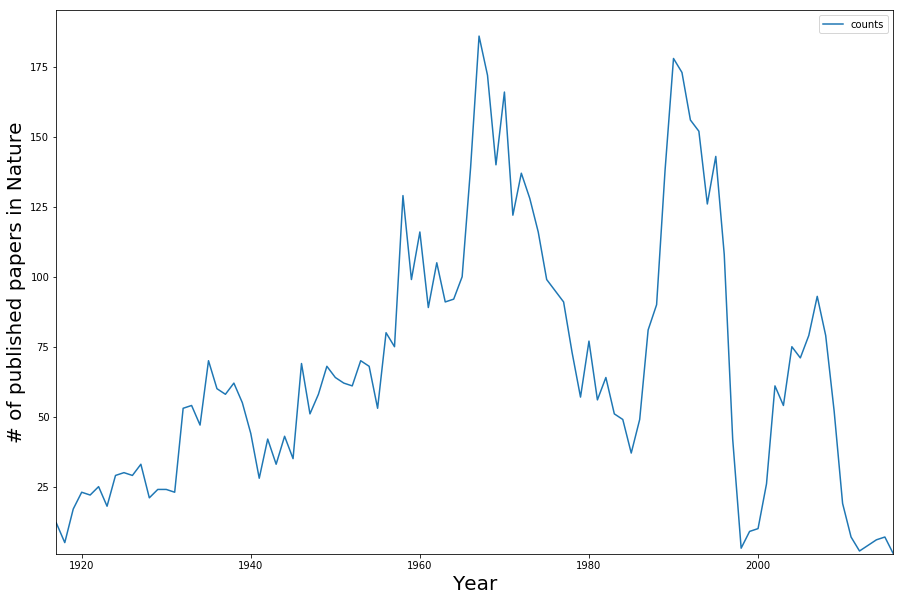

In [69]:
import matplotlib.pyplot as plt

df_clean = df[numpy.isfinite(df['n_citation'])]
df_clean = df_clean.loc[df['lang'] == 'en']
df_clean = df_clean.loc[df['venue'] == 'Nature']
df_clean = df_clean[['id','title', 'abstract', 'authors', 'keywords', 'lang', 'n_citation', 'references', 'url', 'venue', 'year']]
df_clean = df_clean.sort_values(['n_citation'], ascending=[False])
# df_clean.head(20).to_csv('sample.csv', sep=',', index=False)
# df_clean.head(10).to_csv('sample.csv', sep=',', index=False)
df_clean

df_with_venue_citations = df_clean.groupby(['year']).size().reset_index(name='counts')
df_with_venue_citations = df_with_venue_citations.tail(100)

plt.rcParams['figure.figsize']=(15,10)
ans = df_with_venue_citations[['year','counts']].plot.line('year', 'counts')
ans.set_ylim(ymin=1)
ans.set_xlabel("Year", fontsize=20)
ans.set_ylabel("# of published papers in Nature", fontsize=20)
plt.show()

# df_with_venue_citations = df_with_venue_citations.sort_values(['n_citation'], ascending=[False])
# df_with_venue_citations.head(20).to_csv('top_venues.csv', sep=',', index=False)

# df_clean = df_clean[numpy.isfinite(df_clean['venue'])]

In [ ]:
# Getting CS keywords